# РК1

## ИУ5-25М Ваксина Ия Романовна
### Вариант 2

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [9]:
data_loaded = pd.read_csv('marvel-wikia-data.csv')

In [10]:
data_loaded.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Задача 2
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "target (mean) encoding".

In [11]:
cols_filter = ['name', 'ALIGN', 'EYE', 'HAIR', 'SEX',
        'ALIVE', 'APPEARANCES', 'Year']
data = data_loaded[cols_filter]
data.head()

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
0,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,1963.0
4,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


In [12]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('name', ('object', 0)),
 ('ALIGN', ('object', 2812)),
 ('EYE', ('object', 9767)),
 ('HAIR', ('object', 4264)),
 ('SEX', ('object', 854)),
 ('ALIVE', ('object', 3)),
 ('APPEARANCES', ('float64', 1096)),
 ('Year', ('float64', 815))]

In [13]:
# Заполним пропуски года средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Year', data['Year'].mean())
impute_na(data, 'APPEARANCES', data['APPEARANCES'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# категориальные признаки заполнить значениями по умолчанию
# большинство персонажей мужские, нейтральные
# цвет волос и глаз укажем просто другим
impute_na(data, 'ALIGN', 'Neutral Characters')
impute_na(data, 'EYE', 'Other')
impute_na(data, 'HAIR', 'Other')
impute_na(data, 'SEX', 'Male Characters')

In [15]:
# Мало пропусков для поля ALIVE, поэтому можно удалить записи с пропусками без потерь
data.dropna(subset=['ALIVE'], inplace=True)

<ipython-input-15-ecec0c0fd24c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['ALIVE'], inplace=True)


In [16]:
data.isnull().sum()

name           0
ALIGN          0
EYE            0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
Year           0
dtype: int64

In [21]:
#TargetEncoder
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

In [25]:
ce_TargetEncoder1 = ce_TargetEncoder()
data_MEAN_ENC = ce_TargetEncoder1.fit_transform(data[data.columns.difference(['APPEARANCES'])], data['APPEARANCES']),

In [26]:
data_MEAN_ENC

(           ALIGN      ALIVE         EYE       HAIR        SEX         Year  \
 0      33.683322  18.392749  104.836723  23.168649  16.045035  1962.000000   
 1      33.683322  18.392749   51.433199  20.029622  16.045035  1941.000000   
 2      12.667594  18.392749   51.433199  17.267059  16.045035  1974.000000   
 3      33.683322  18.392749   51.433199  17.267059  16.045035  1963.000000   
 4      33.683322  18.392749   51.433199  26.578258  16.045035  1950.000000   
 ...          ...        ...         ...        ...        ...          ...   
 16371   8.806292  18.392749   38.343777  15.964772  16.045035  1984.951803   
 16372  33.683322  18.392749   51.433199  16.806804  16.045035  1984.951803   
 16373   8.806292  18.392749   11.589492  16.806804  16.045035  1984.951803   
 16374  12.667594  18.392749    5.486665   5.864998  16.045035  1984.951803   
 16375   8.806292  18.392749    5.486665   5.864998  16.045035  1984.951803   
 
              name  
 0      540.845752  
 1      

In [27]:
data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters'], dtype=object)

In [33]:
def check_mean_encoding(field):
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            prob = sum(data_filter['APPEARANCES']) / data_filter.shape[0]
            print(s, '-' , prob)

In [34]:
check_mean_encoding('SEX')

Male Characters - 16.04503460427325
Female Characters - 20.0831231997079
Genderfluid Characters - 282.5
Agender Characters - 19.491114019778937


In [35]:
check_mean_encoding('ALIGN')

Good Characters - 33.68332202114969
Neutral Characters - 12.66759366322044
Bad Characters - 8.806292071802542


## Задача 22
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по максимальному значению.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [39]:
# Нужно ли масштабирование
data.describe()

,APPEARANCES,Year
count,16373.000000,16373.000000
mean,17.033377,1984.951803
std,93.100453,19.169744
min,1.000000,1939.000000
25%,1.000000,1975.000000
50%,3.000000,1988.000000
75%,11.000000,2000.000000
max,4043.000000,2013.000000


In [45]:
X_ALL = data[['APPEARANCES', 'Year']]

In [46]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [47]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['APPEARANCES'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((13098, 2), (3275, 2))

In [48]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,APPEARANCES,Year
count,16373.000000,16373.000000
mean,0.004213,0.986066
std,0.023028,0.009523
min,0.000247,0.963239
25%,0.000247,0.981123
50%,0.000742,0.987581
75%,0.002721,0.993542
max,1.000000,1.000000


In [49]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

In [51]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

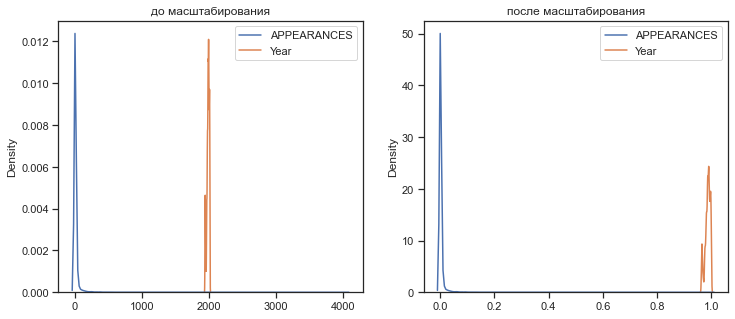

In [53]:
draw_kde(['APPEARANCES', 'Year'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

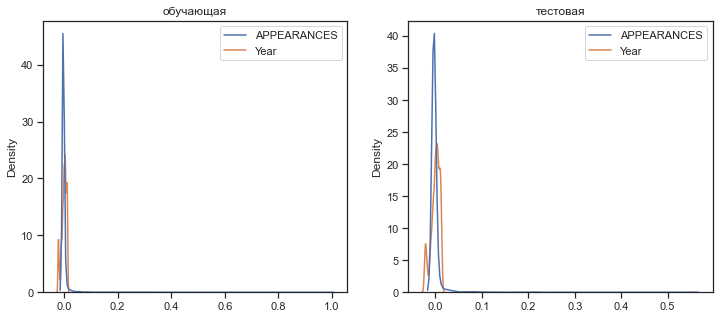

In [55]:
draw_kde(['APPEARANCES', 'Year'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

## Дополнительное задание
Для произвольной колонки данных построить парные диаграммы (pairplot).

In [58]:
import seaborn as sns

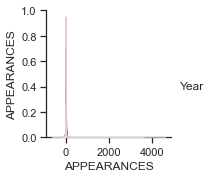

In [62]:
sns.pairplot(data, hue='Year')